In [70]:
# Import MNIST data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [71]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=mnist.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=mnist.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


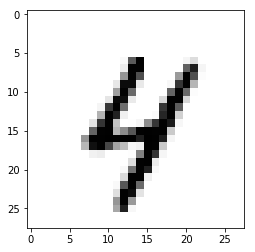

In [72]:
sample_1 = mnist.train.images[47].reshape(28,28)
plt.imshow(sample_1, cmap='Greys')

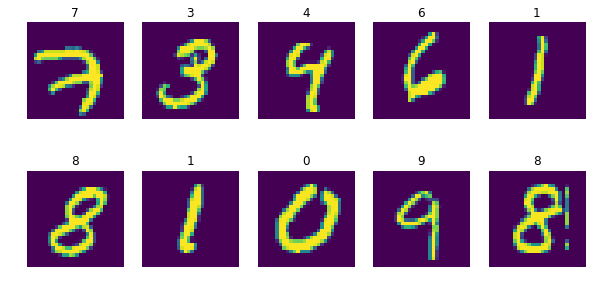

In [73]:
fig, axes = plt.subplots(2, 5, figsize=(10,5))
for img, label, ax in zip(mnist.train.images[0:10], np.argmax(mnist.train.labels[0:10], 1), axes.flat):
  ax.set_title(label)
  ax.imshow(img.reshape(28,28))
  ax.axis('off')
plt.show()

In [0]:
#parameters
learning_rate = 0.1
epochs = 500
batch_size = 128

#network parameters
n_hidden_1 = 256
n_hidden_2 = 256
num_input = 28*28
num_classes = 10

In [0]:
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])

In [0]:
weights = {
    'hidden1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'hidden2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'output': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}

biases = {
    'bias1': tf.Variable(tf.random_normal([n_hidden_1])),
    'bias2': tf.Variable(tf.random_normal([n_hidden_2])),
    'output': tf.Variable(tf.random_normal([num_classes]))
}

In [0]:
def neural_net(X):
  layer_1 = tf.add(tf.matmul(X, weights['hidden1']), biases['bias1'])
  layer_2 = tf.add(tf.matmul(layer_1, weights['hidden2']), biases['bias2'])
  out_layer = tf.add(tf.matmul(layer_2, weights['output']), biases['output'])
  return out_layer

In [0]:
logits = neural_net(X)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss_op)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
acc_op = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
# acc, acc_op = tf.metrics.accuracy(labels=tf.argmax(Y, 1), predictions=tf.argmax(logits,1))

confusion_op = tf.math.confusion_matrix(tf.argmax(Y, 1), tf.argmax(logits, 1))

init = tf.global_variables_initializer()

In [88]:
session = tf.Session()
session.run(init)
  
for epoch in range(epochs):
    
  batch_x, batch_y = mnist.train.next_batch(batch_size)
  session.run(optimizer, feed_dict={X: batch_x, Y: batch_y})
    
  # session.run(optimizer, feed_dict={X: mnist.train.images, Y: mnist.train.labels})
    
  if not epoch % 20:
      
    loss, acc = session.run([loss_op, acc_op], feed_dict={X: batch_x, Y: batch_y})
    print(f'epoch: {epoch}, loss: {loss:.4f}, accuracy:{acc:.4f}')

epoch: 0, loss: 11110.7695, accuracy:0.2109
epoch: 20, loss: 2765.8972, accuracy:0.7344
epoch: 40, loss: 1129.8361, accuracy:0.8672
epoch: 60, loss: 513.0293, accuracy:0.8750
epoch: 80, loss: 507.8253, accuracy:0.8828
epoch: 100, loss: 323.2057, accuracy:0.8672
epoch: 120, loss: 559.9688, accuracy:0.8594
epoch: 140, loss: 278.0383, accuracy:0.8906
epoch: 160, loss: 166.4188, accuracy:0.8984
epoch: 180, loss: 187.3110, accuracy:0.8594
epoch: 200, loss: 322.9467, accuracy:0.8281
epoch: 220, loss: 99.2565, accuracy:0.8906
epoch: 240, loss: 125.4046, accuracy:0.8672
epoch: 260, loss: 60.8061, accuracy:0.8984
epoch: 280, loss: 65.3620, accuracy:0.8984
epoch: 300, loss: 63.5616, accuracy:0.8984
epoch: 320, loss: 131.2339, accuracy:0.8359
epoch: 340, loss: 92.0803, accuracy:0.8359
epoch: 360, loss: 53.1838, accuracy:0.8906
epoch: 380, loss: 75.7700, accuracy:0.8359
epoch: 400, loss: 106.3715, accuracy:0.8672
epoch: 420, loss: 94.4792, accuracy:0.8984
epoch: 440, loss: 74.6466, accuracy:0.8672

In [93]:
confusion = session.run(confusion_op, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
print(confusion)

[[887   0  12  25   3  18  10  11  12   2]
 [  0 989  52  29   0   1   3   1  60   0]
 [  3   4 930  46   6   1   6  10  17   9]
 [  0   3  35 934   0  15   3  10   7   3]
 [  1   6  16   4 786   0   3  12  25 129]
 [  5   3  32  99   8 675  11  11  40   8]
 [ 12   3  77   7  11  10 827   2   9   0]
 [  1   8  35  48   4   1   0 917   3  11]
 [  3  12  81  77  10  22   3  14 737  15]
 [  4   9   1  26  16  12   1  80  38 822]]


In [98]:
from sklearn.metrics import classification_report

yhat = session.run(logits, feed_dict={X: mnist.test.images})
yhat = np.argmax(yhat, axis=1)
y = np.argmax(mnist.test.labels, axis=1)

print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       980
           1       0.95      0.87      0.91      1135
           2       0.73      0.90      0.81      1032
           3       0.72      0.92      0.81      1010
           4       0.93      0.80      0.86       982
           5       0.89      0.76      0.82       892
           6       0.95      0.86      0.91       958
           7       0.86      0.89      0.88      1028
           8       0.78      0.76      0.77       974
           9       0.82      0.81      0.82      1009

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



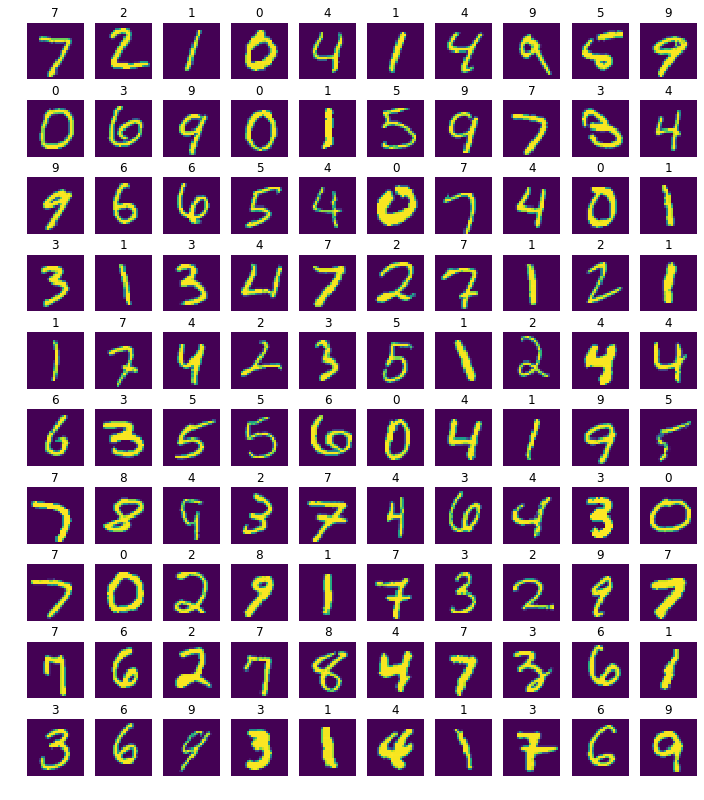

In [104]:
fig, axes = plt.subplots(10, 10, figsize=(12,14))
for img, label, ax in zip(mnist.test.images[0:100], yhat, axes.flat):
  ax.set_title(label)
  ax.imshow(img.reshape(28,28))
  ax.axis('off')
plt.show()

In [0]:
session.close()